In [1]:
import numpy as np
import matplotlib.pyplot as plt
PI = np.pi

In [2]:
N = 5
f_sampling = 200
f0 = 60

Delta = 1/(2*f_sampling)
fm_tab = np.linspace(-4*f0, 4*f0, 1000)

In [3]:
def get_Hf_theoretic(f, f0, N):
    return 1/( 1+ (f/f0)**(2*N) )

In [4]:
def get_Hf_theoretic_II(f, f0, N):

    k = np.arange(1, N+1)*2 - 1
    fi = f0*np.exp( 1j * PI * k/10)

    return f0**N / np.prod(f-fi)

In [5]:
Hf_theoretic = get_Hf_theoretic(fm_tab, f0, N)
Hf_theoretic_II = list(map(lambda fm: np.abs(get_Hf_theoretic_II(fm, f0,N)),  fm_tab ))

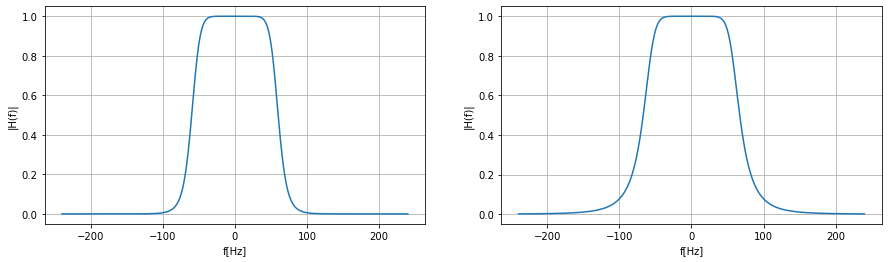

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(15,4), sharey=False)
axs[0].plot(fm_tab, Hf_theoretic)
axs[1].plot(fm_tab, Hf_theoretic_II)

for ax in axs:
    ax.set_xlabel('f[Hz]')
    ax.set_ylabel('|H(f)|')
    ax.grid(True)
plt.plot() ;

# Fitting polynimial 


$$ H(f_m) = \frac{\sum_{k=0}^q \alpha_k (e^{2\pi i f_m \Delta})^k}{1 - \sum_{j=1}^p \beta_k  (e^{2\pi i f_m \Delta})^j}$$

$$H(z) = \frac{0.00093𝑧^5 + 0.004651 𝑧^4 + 0.009303 𝑧^3 + 0.009303 𝑧^2 +0.004651 𝑧 + 0.00093}{−0.146563 𝑧^5 + 1.008265 𝑧^4 - 2.843225 𝑧^3 + 4.132 𝑧^2 - 3.120708 𝑧 +1.0}$$

In [7]:
def get_Hf(fm, N, Delta, alpha_coeffs, beta_coeffs):
    
    k = np.arange(N+1)   
    l1 = np.exp(2*PI* 1j *fm * Delta*k)
    numerator = np.dot(alpha_coeffs, l1)
    
    j= np.arange(1,N+1) 
    l2 = np.exp(2*PI* 1j *fm * Delta*j)       
    denominator = 1 - np.dot(beta_coeffs, l2)

    return numerator / denominator

In [8]:
alpha_coeffs = np.array([0.00093029221036169,0.0046514610518084,0.0093029221036169,0.0093029221036169,0.0046514610518084,0.00093029221036169])
beta_coeffs = np.array([3.1207081013357,-4.1320001157791,2.84322526468123,-1.00826536855252,0.146562767583152 ])

In [9]:
Hf = list(map(lambda fm: get_Hf(fm,N, Delta, alpha_coeffs, beta_coeffs),  fm_tab ))
Hf_module = list(map(lambda fm: np.abs(get_Hf(fm,N, Delta, alpha_coeffs, beta_coeffs)),  fm_tab ))
Hf_phase = list(map(lambda fm: np.angle(get_Hf(fm,N, Delta, alpha_coeffs, beta_coeffs)),  fm_tab ))

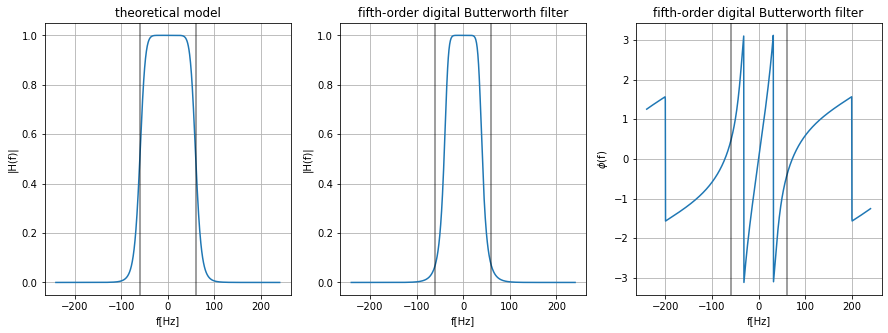

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
axs[0].plot(fm_tab, Hf_theoretic)
axs[1].plot(fm_tab, Hf_module)
axs[2].plot(fm_tab, Hf_phase)

axs[0].set_ylabel('|H(f)|')
axs[1].set_ylabel('|H(f)|')
axs[2].set_ylabel('$\phi$(f)')

axs[0].set_title('theoretical model')
axs[1].set_title('fifth-order digital Butterworth filter')
axs[2].set_title('fifth-order digital Butterworth filter')

for ax in axs:
    ax.set_xlabel('f[Hz]')
    ax.grid(True)
    ax.axvline(x= f0, c='black', alpha = 0.5)
    ax.axvline(x= -f0, c='black', alpha = 0.5)

plt.plot() ;